# Analisis basico de resumen de casos corona virus Guatemala 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dir_resumen = '../data/resumen_todos.csv'
casos = pd.read_csv(dir_resumen, header = 0, parse_dates = True)
dir_comida = '../data/resumen_OllaComunitaria.csv'
ollaComunitaria = pd.read_csv(dir_comida, header = 0, parse_dates = True)

# dar formato a fechas
cols_fecha = ["fecha"]
for col in cols_fecha:
    casos[col] = pd.to_datetime(casos[col], yearfirst = True)
    ollaComunitaria[col] = pd.to_datetime(ollaComunitaria[col], yearfirst = True)

# mostrar columnas y tipo de dato
print(casos.info())
print(ollaComunitaria.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
fecha          92 non-null datetime64[ns]
confirmados    92 non-null int64
recuperados    91 non-null float64
fallecidos     92 non-null int64
activos        92 non-null int64
pruebas        92 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 4.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
fecha                                  39 non-null datetime64[ns]
Xela (TanLechugaYo)                    21 non-null float64
Capital (Rayuela GT)                   2 non-null float64
Antigua (BanderasBlancas)              4 non-null float64
AltaVerapaz (Club Social DVictoria)    2 non-null float64
Santiago_Atitlan                       2 non-null float64
SanTecla_ElSalvador                    18 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.2 KB
None


In [3]:
casos = casos.set_index(keys = 'fecha', drop = True)
ollaComunitaria = ollaComunitaria.set_index(keys = 'fecha', drop = True).fillna(0)

#casos = casos.drop(columns = 'fuente') # ignorar fuente de informacion
# mostrar algunos datos
print(casos.head())
print(ollaComunitaria.head())

                     confirmados  recuperados  fallecidos  activos  pruebas
fecha                                                                      
2020-03-13 06:00:00            1          0.0           0        1        0
2020-03-14 06:00:00            2          0.0           0        2        0
2020-03-15 06:00:00            3          0.0           1        2        0
2020-03-16 06:00:00            6          0.0           1        5        0
2020-03-17 06:00:00            6          0.0           1        5        0
            Xela (TanLechugaYo)  Capital (Rayuela GT)  \
fecha                                                   
2020-05-01                  0.0                   0.0   
2020-05-02                  0.0                   0.0   
2020-05-03                  0.0                   0.0   
2020-05-04                  0.0                   0.0   
2020-05-05                116.0                   0.0   

            Antigua (BanderasBlancas)  AltaVerapaz (Club Social DVic

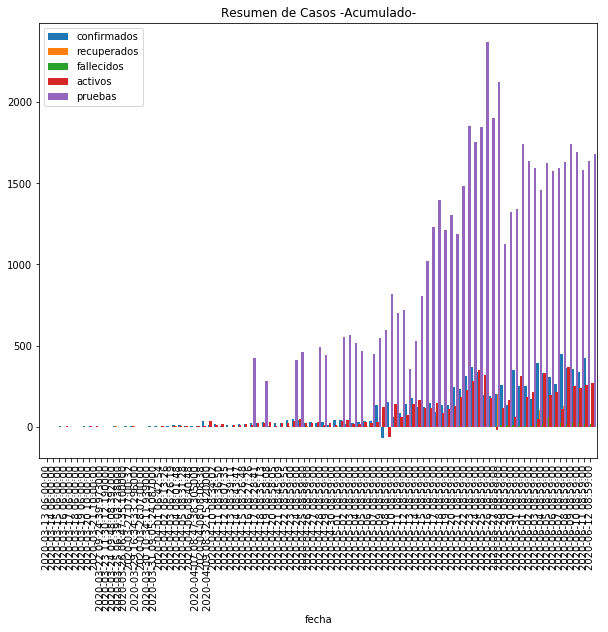

In [4]:
fig1 = plt.figure(figsize=(10,8))
fig1ax1 = fig1.add_subplot(1,1,1)
fig1ax1.set_title('Resumen de Casos -Acumulado-')
reversed_cumsum = casos-casos.shift(1).fillna(0)
reversed_cumsum.plot.bar(ax = fig1ax1 , width = 2)

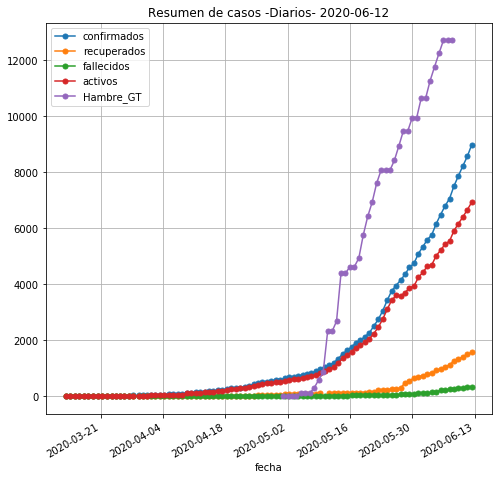

In [5]:
fig2 = plt.figure(figsize=(8,8))
fig2ax1 = fig2.add_subplot(1,1,1)
fig2ax1.set_title('Resumen de casos -Diarios- {}'.format(casos.index.tolist()[-1].strftime('%Y-%m-%d')))
casos[['confirmados','recuperados','fallecidos','activos']].plot( ax = fig2ax1, marker='.',markersize=10)
ollaComunitaria['total_GT'] = ollaComunitaria['Xela (TanLechugaYo)'] \
                              + ollaComunitaria['Capital (Rayuela GT)'] \
                              + ollaComunitaria['Antigua (BanderasBlancas)'] \
                              + ollaComunitaria['AltaVerapaz (Club Social DVictoria)']\
                              + ollaComunitaria['Santiago_Atitlan']
ollaComunitaria['total_SV'] = ollaComunitaria['SanTecla_ElSalvador']
ollaComunitaria['total_GT'].cumsum().plot( ax = fig2ax1, marker='.',markersize=10,label="Hambre_GT")
fig2ax1.legend(loc='best')
fig2ax1.grid()
fig2.savefig("../imgs/resumen.png".format())


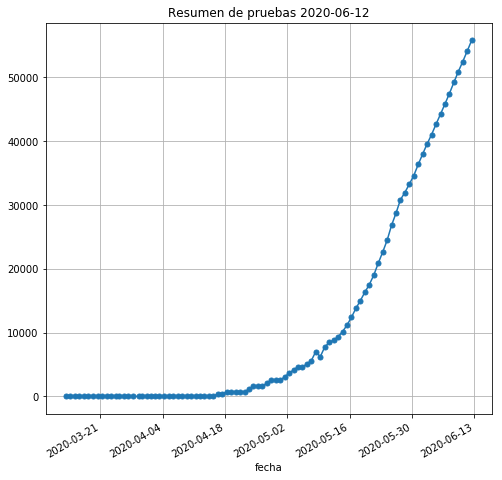

In [6]:
fig3 = plt.figure(figsize=(8,8))
fig3ax1 = fig3.add_subplot(1,1,1)
fig3ax1.set_title('Resumen de pruebas {}'.format(casos.index.tolist()[-1].strftime('%Y-%m-%d')))
casos['pruebas'].plot( ax = fig3ax1, marker='.',markersize=10)
fig3ax1.grid()
fig3.savefig("../imgs/pruebas.png".format())

In [7]:
print('confirmados: ', max(casos['confirmados']))
print('recuperados: ', max(casos['recuperados']))
print('fallecidos: ', max(casos['fallecidos']))
print('activos: ', max(casos['activos']))
print('pruebas realizadas: ',max(casos['pruebas']))
print('Comida Entregada GT: ', max(ollaComunitaria['total_GT'].cumsum()))
print('Comida Entregada GT: ', max(ollaComunitaria['total_GT'].cumsum()))

confirmados:  8982
recuperados:  1567.0
fallecidos:  351
activos:  6927
pruebas realizadas:  55795
Comida Entregada GT:  12697.0
Comida Entregada GT:  12697.0


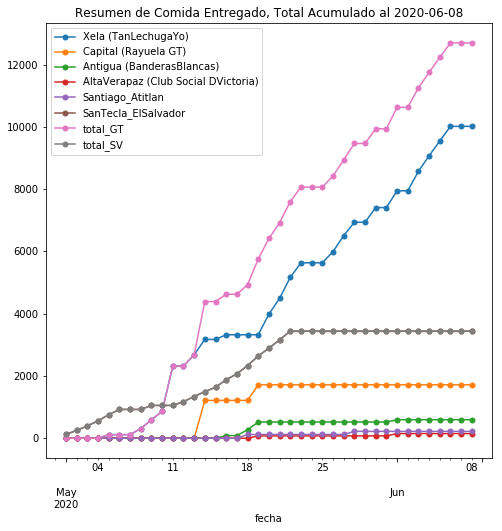

In [8]:
fig3 = plt.figure(figsize=(8,8))
fig3ax1 = fig3.add_subplot(1,1,1)
fig3ax1.set_title('Resumen de Comida Entregado, Total Acumulado al {}'.format(ollaComunitaria.index.tolist()[-1].strftime('%Y-%m-%d')))
ollaComunitaria.cumsum().plot( ax = fig3ax1, marker='.',markersize=10)
fig3.savefig("../imgs/hambre.png".format())